In [1]:
# For data
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
train_filepath = './data/train.csv'
df = pd.read_csv(train_filepath)

## Analysis of the training set

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
7,False,False,False,True,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
9,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [53]:
# descriptive statistics summary
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

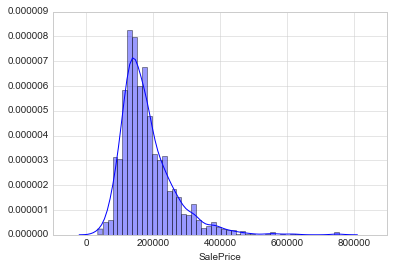

In [55]:
#histogram
sns.distplot(df['SalePrice']);

In [5]:
# To check how many columns have missing values - this can be repeated to see the progress made
def show_missing():
    missing = df.columns[df.isnull().any()].tolist()
    return missing

In [6]:
show_missing()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
df[show_missing()].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# Looking at categorical values
def cat_exploration(column):
    return df[column].value_counts()

In [9]:
# Imputing the missing values
def cat_imputation(column, value):
    df.loc[df[column].isnull(),column] = value

In [10]:
# check correlation with LotArea
df['LotFrontage'].corr(df['LotArea'])

0.42609501877180794

In [11]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
house_prices = df.SalePrice

In [14]:
house_prices.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [15]:
df.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
                 ... 
BedroomAbvGr     1460
KitchenAbvGr     1460
KitchenQual      1460
TotRmsAbvGrd     1460
Functional       1460
Fireplaces       1460
FireplaceQu       770
GarageType       1379
GarageYrBlt      1379
GarageFinish     1379
GarageCars       1460
GarageArea       1460
GarageQual       1379
GarageCond       1379
PavedDrive

## Selection of the features variables and the target metric 

In [16]:
predictor_vars_x =  ['LotArea', 'YrSold', 'MoSold', 'MSSubClass', 'MiscVal']
predictor_vars = predictor_vars_x + ['SalePrice']

In [17]:
df_predictors = df[predictor_vars]

In [18]:
df_predictors.describe()

,LotArea,YrSold,MoSold,MSSubClass,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,2007.815753,6.321918,56.897260,43.489041,180921.195890
std,9981.264932,1.328095,2.703626,42.300571,496.123024,79442.502883
min,1300.000000,2006.000000,1.000000,20.000000,0.000000,34900.000000
25%,7553.500000,2007.000000,5.000000,20.000000,0.000000,129975.000000
50%,9478.500000,2008.000000,6.000000,50.000000,0.000000,163000.000000
75%,11601.500000,2009.000000,8.000000,70.000000,0.000000,214000.000000
max,215245.000000,2010.000000,12.000000,190.000000,15500.000000,755000.000000


## Selection of the evaluation model - Decision tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
prediction_model = DecisionTreeRegressor()

In [21]:
df_predictors_filtered = df_predictors.dropna(axis=0)

In [22]:
df_predictors_filtered.count()

LotArea       1460
YrSold        1460
MoSold        1460
MSSubClass    1460
MiscVal       1460
SalePrice     1460
dtype: int64

In [23]:
prediction_model.fit(df_predictors_filtered[predictor_vars_x], df_predictors_filtered[['SalePrice']])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [24]:
print(df_predictors_filtered.head())
print(prediction_model.predict(df_predictors_filtered[predictor_vars_x].head()))

   LotArea  YrSold  MoSold  MSSubClass  MiscVal  SalePrice
0     8450    2008       2          60        0     208500
1     9600    2007       5          20        0     181500
2    11250    2008       9          60        0     223500
3     9550    2006       2          70        0     140000
4    14260    2008      12          60        0     250000
[ 208500.  181500.  223500.  140000.  250000.]


## Split set into training and testing set - evaluation of the model's accuracy 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_vars = df_predictors_filtered[predictor_vars_x]
y_vars = df_predictors_filtered[['SalePrice']]

In [27]:
df_predictors_filtered[predictor_vars_x].head()

,LotArea,YrSold,MoSold,MSSubClass,MiscVal
0,8450,2008,2,60,0
1,9600,2007,5,20,0
2,11250,2008,9,60,0
3,9550,2006,2,70,0
4,14260,2008,12,60,0


In [28]:
train_x, val_x, train_y, val_y = train_test_split(x_vars, y_vars, random_state = 0)

In [29]:
prediction_model.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
predictions = prediction_model.predict(val_x)

In [32]:
mean_absolute_error(predictions, val_y)

64837.423744292231

## Selection of the number of layer that gives the least MAE 

In [33]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [34]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  51480
Max leaf nodes: 50  		 Mean Absolute Error:  49858
Max leaf nodes: 500  		 Mean Absolute Error:  63774
Max leaf nodes: 5000  		 Mean Absolute Error:  64599


## Selection of the evaluation model - Random forest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest_model = RandomForestRegressor(n_estimators=100)

In [37]:
forest_model.fit(train_x, train_y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
sorted(zip(map(lambda x: round(x, 4), forest_model.feature_importances_), predictor_vars_x), 
             reverse=True)

[(0.55389999999999995, 'LotArea'),
 (0.1956, 'MSSubClass'),
 (0.15179999999999999, 'MoSold'),
 (0.086199999999999999, 'YrSold'),
 (0.0124, 'MiscVal')]

In [39]:
predictions_train = forest_model.predict(val_x)

In [40]:
mean_absolute_error(predictions_train, val_y)

46821.104557208084

In [41]:
test_filepath = './data/test.csv'
csv_df = pd.read_csv(test_filepath)
df_test = csv_df[predictor_vars_x]

In [42]:
df_test.count()

LotArea       1459
YrSold        1459
MoSold        1459
MSSubClass    1459
MiscVal       1459
dtype: int64

In [43]:
df_test.head()

,LotArea,YrSold,MoSold,MSSubClass,MiscVal
0,11622,2010,6,20,0
1,14267,2010,6,20,12500
2,13830,2010,3,60,0
3,9978,2010,6,60,0
4,5005,2010,1,120,0


In [44]:
df_test.describe()

,LotArea,YrSold,MoSold,MSSubClass,MiscVal
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,9819.161069,2007.769705,6.104181,57.378341,58.167923
std,4955.517327,1.301740,2.722432,42.746880,630.806978
min,1470.000000,2006.000000,1.000000,20.000000,0.000000
25%,7391.000000,2007.000000,4.000000,20.000000,0.000000
50%,9399.000000,2008.000000,6.000000,50.000000,0.000000
75%,11517.500000,2009.000000,8.000000,70.000000,0.000000
max,56600.000000,2010.000000,12.000000,190.000000,17000.000000


In [45]:
predictions = forest_model.predict(df_test)

## Preparation of the results for the submission 

In [46]:
predictions.shape

(1459,)

In [47]:
df_test.head()

,LotArea,YrSold,MoSold,MSSubClass,MiscVal
0,11622,2010,6,20,0
1,14267,2010,6,20,12500
2,13830,2010,3,60,0
3,9978,2010,6,60,0
4,5005,2010,1,120,0


In [48]:
df_test = csv_df[['Id']]

In [49]:
df_test['SalePrice'] = predictions

/Users/riccardo/Documents/personal/kaggle-competitions/env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
df_test.head()

,Id,SalePrice
0,1461,265220.38
1,1462,253490.64
2,1463,239149.47
3,1464,303252.82
4,1465,266158.50


In [51]:
df_test.to_csv('./data/results.csv', index=False)